# Logestic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv("bank-full.csv",sep=';')

In [3]:
df=data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
label_encoder=preprocessing.LabelEncoder()
data['job']=label_encoder.fit_transform(data['job'])
data['marital']=label_encoder.fit_transform(data['marital'])
data['education']=label_encoder.fit_transform(data['education'])
data['default']=label_encoder.fit_transform(data['default'])
data['housing']=label_encoder.fit_transform(data['housing'])
data['loan']=label_encoder.fit_transform(data['loan'])
data['contact']=label_encoder.fit_transform(data['contact'])
data['month']=label_encoder.fit_transform(data['month'])
data['y']=label_encoder.fit_transform(data['y'])
data['poutcome']=label_encoder.fit_transform(data['poutcome'])
data['poutcome']=label_encoder.fit_transform(data['poutcome'])

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [6]:
ndata=data[['balance','duration']]
ndata

,balance,duration
0,2143,261
1,29,151
2,2,76
3,1506,92
4,1,198
...,...,...
45206,825,977
45207,1729,456
45208,5715,1127
45209,668,508


C:\Users\Hemanth H L\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

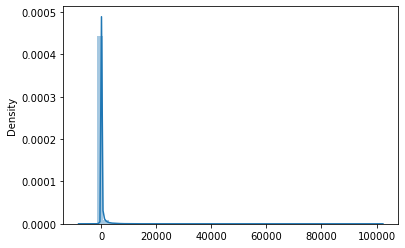

In [7]:
sns.distplot(data)

C:\Users\Hemanth H L\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

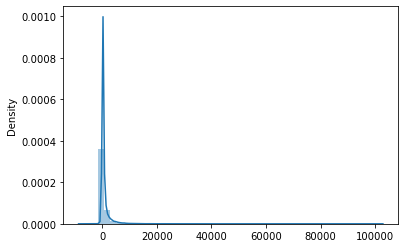

In [8]:
sns.distplot(ndata)

In [9]:
cdata= (ndata - np.min(ndata)) / (np.max(ndata) - np.min(ndata))
cdata

,balance,duration
0,0.092259,0.053070
1,0.073067,0.030704
2,0.072822,0.015453
3,0.086476,0.018707
4,0.072812,0.040260
...,...,...
45206,0.080293,0.198658
45207,0.088501,0.092721
45208,0.124689,0.229158
45209,0.078868,0.103294


In [10]:
data=data.drop(['balance','duration'],axis=1)

In [11]:
newdata=pd.concat([cdata,data],axis=1)
newdata

,balance,duration,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0.092259,0.053070,58,4,1,2,0,1,0,2,5,8,1,-1,0,3,0
1,0.073067,0.030704,44,9,2,1,0,1,0,2,5,8,1,-1,0,3,0
2,0.072822,0.015453,33,2,1,1,0,1,1,2,5,8,1,-1,0,3,0
3,0.086476,0.018707,47,1,1,3,0,1,0,2,5,8,1,-1,0,3,0
4,0.072812,0.040260,33,11,2,3,0,0,0,2,5,8,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.080293,0.198658,51,9,1,2,0,0,0,0,17,9,3,-1,0,3,1
45207,0.088501,0.092721,71,5,0,0,0,0,0,0,17,9,2,-1,0,3,1
45208,0.124689,0.229158,72,5,1,1,0,0,0,0,17,9,5,184,3,2,1
45209,0.078868,0.103294,57,1,1,1,0,0,0,1,17,9,4,-1,0,3,0


In [12]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   balance    45211 non-null  float64
 1   duration   45211 non-null  float64
 2   age        45211 non-null  int64  
 3   job        45211 non-null  int32  
 4   marital    45211 non-null  int32  
 5   education  45211 non-null  int32  
 6   default    45211 non-null  int32  
 7   housing    45211 non-null  int32  
 8   loan       45211 non-null  int32  
 9   contact    45211 non-null  int32  
 10  day        45211 non-null  int64  
 11  month      45211 non-null  int32  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int64  
 16  y          45211 non-null  int32  
dtypes: float64(2), int32(9), int64(6)
memory usage: 4.3 MB


In [13]:
x=newdata.iloc[:,0:16].values
x

array([[ 9.22593648e-02,  5.30703538e-02,  5.80000000e+01, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 7.30666570e-02,  3.07035380e-02,  4.40000000e+01, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 7.28215278e-02,  1.54534364e-02,  3.30000000e+01, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       ...,
       [ 1.24689049e-01,  2.29158194e-01,  7.20000000e+01, ...,
         1.84000000e+02,  3.00000000e+00,  2.00000000e+00],
       [ 7.88680479e-02,  1.03294022e-01,  5.70000000e+01, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 9.97766601e-02,  7.34038227e-02,  3.70000000e+01, ...,
         1.88000000e+02,  1.10000000e+01,  1.00000000e+00]])

In [14]:
y=newdata.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [16]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.28%


C:\Users\Hemanth H L\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score=roc_auc_score(y,lr.predict(x))
logit_roc_score

0.5017359692769779

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 90.22%


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 5)
fit = rfe.fit(x, y)

C:\Users\Hemanth H L\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Hemanth H L\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hemanth H L\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

In [20]:
fit.support_

array([ True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False])

In [21]:
fit.ranking_

array([ 1,  1,  9, 10,  3,  4,  2,  1,  1,  1, 12,  8,  5, 11,  6,  7])

In [22]:
newdata.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   balance    45211 non-null  float64
 1   duration   45211 non-null  float64
 2   age        45211 non-null  int64  
 3   job        45211 non-null  int32  
 4   marital    45211 non-null  int32  
 5   education  45211 non-null  int32  
 6   default    45211 non-null  int32  
 7   housing    45211 non-null  int32  
 8   loan       45211 non-null  int32  
 9   contact    45211 non-null  int32  
 10  day        45211 non-null  int64  
 11  month      45211 non-null  int32  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int64  
dtypes: float64(2), int32(8), int64(6)
memory usage: 4.1 MB


In [23]:
newdata.columns

Index(['balance', 'duration', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [24]:
x1=newdata[['balance', 'duration','housing', 'loan', 'contact']]

In [64]:
y1=y
y1

array([0, 0, 0, ..., 1, 0, 0])

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.2,random_state=0)

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score=roc_auc_score(y1,lr.predict(x1))
logit_roc_score

0.5785084966545039

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.69%


In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score=roc_auc_score(y_test,rf.predict(x_test))
logit_roc_score

0.6159247483713989

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 5)
fit = rfe.fit(x, y)

C:\Users\Hemanth H L\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Hemanth H L\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hemanth H L\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

In [31]:
fit.support_

array([ True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False])

In [32]:
fit.ranking_

array([ 1,  1,  9, 10,  3,  4,  2,  1,  1,  1, 12,  8,  5, 11,  6,  7])

In [33]:
newdata.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   balance    45211 non-null  float64
 1   duration   45211 non-null  float64
 2   age        45211 non-null  int64  
 3   job        45211 non-null  int32  
 4   marital    45211 non-null  int32  
 5   education  45211 non-null  int32  
 6   default    45211 non-null  int32  
 7   housing    45211 non-null  int32  
 8   loan       45211 non-null  int32  
 9   contact    45211 non-null  int32  
 10  day        45211 non-null  int64  
 11  month      45211 non-null  int32  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int64  
dtypes: float64(2), int32(8), int64(6)
memory usage: 4.1 MB


In [34]:
x1=newdata[['balance', 'duration','housing', 'loan', 'contact']]

In [35]:
y1=y
y1

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.2,random_state=0)

In [37]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.61%


In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score=roc_auc_score(y1,lr.predict(x1))
logit_roc_score

0.5785084966545039

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.69%


In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score=roc_auc_score(y_test,rf.predict(x_test))
logit_roc_score

0.6159247483713989

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7980
           1       0.41      0.29      0.34      1063

    accuracy                           0.87      9043
   macro avg       0.66      0.62      0.63      9043
weighted avg       0.85      0.87      0.86      9043



In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,rf.predict(x_test))

In [43]:
print(confusion_matrix)

[[7533  447]
 [ 757  306]]


In [44]:
x2=x1.iloc[:,0:16]
x2


,balance,duration,housing,loan,contact
0,0.092259,0.053070,1,0,2
1,0.073067,0.030704,1,0,2
2,0.072822,0.015453,1,1,2
3,0.086476,0.018707,1,0,2
4,0.072812,0.040260,0,0,2
...,...,...,...,...,...
45206,0.080293,0.198658,0,0,0
45207,0.088501,0.092721,0,0,0
45208,0.124689,0.229158,0,0,0
45209,0.078868,0.103294,0,0,1


In [45]:
y2=newdata.iloc[:,-1]
y2

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [46]:
bd=pd.concat([x2,y2],axis=1)
bd

,balance,duration,housing,loan,contact,y
0,0.092259,0.053070,1,0,2,0
1,0.073067,0.030704,1,0,2,0
2,0.072822,0.015453,1,1,2,0
3,0.086476,0.018707,1,0,2,0
4,0.072812,0.040260,0,0,2,0
...,...,...,...,...,...,...
45206,0.080293,0.198658,0,0,0,1
45207,0.088501,0.092721,0,0,0,1
45208,0.124689,0.229158,0,0,0,1
45209,0.078868,0.103294,0,0,1,0


In [47]:
count_class_0,count_class_1=bd.y.value_counts()

df_class_0=bd[bd['y']==0]
df_class_1=bd[bd['y']==1]

Random over-sampling:
1    39922
0    39922
Name: y, dtype: int64


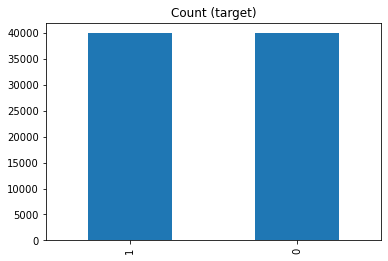

In [48]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.y.value_counts())

df_test_over.y.value_counts().plot(kind='bar', title='Count (target)');

C:\Users\Hemanth H L\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

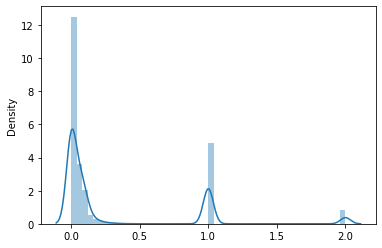

In [49]:
sns.distplot(df_test_over)

In [50]:
Xnew=df_test_over[['balance', 'duration','housing', 'loan', 'contact']]
ynew=df_test_over['y']

In [51]:
ynew.value_counts()

1    39922
0    39922
Name: y, dtype: int64

In [52]:
x_train, x_test, y_train, y_test = train_test_split(Xnew,ynew,test_size = 0.2,random_state=0)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 94.84%


0.9476075322001573

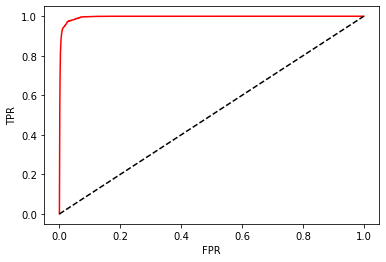

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_score=roc_auc_score(y_test,rf.predict(x_test))
fpr,tpr,thresholds= roc_curve(y_test,rf.predict_proba (x_test)[:,1])
y_pred=rf.predict(x_test)
auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,color='red',label='logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
logit_roc_score

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [56]:
ridge=Ridge()
parameters={'alpha':[5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [5, 10, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [57]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-0.1724507408795942


In [58]:
prediction=ridge_regressor.predict(x_test)

In [59]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.36739822292866936
MSE: 0.17330963785381387
RMSE: 0.41630474157017944


In [60]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [61]:
lasso=Lasso()
parameters={'alpha':[5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-0.25000609724993395


In [62]:
prediction1=lasso_regressor.predict(x_test)

In [63]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction1))
print('MSE:', metrics.mean_squared_error(y_test, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))

MAE: 0.5000308822413877
MSE: 0.25003474258199615
RMSE: 0.500034741375033
